[Reference Video](https://www.youtube.com/watch?v=Ye7iJNLON-A&ab_channel=CampusX) <br>
[Reference Video 2](https://www.youtube.com/watch?v=iRCaMnR_bpA&ab_channel=CampusX)

In [293]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reading data

In [294]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ML : Quikr Car Price Prediction/quikr_car - quikr_car.csv")
display(data)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Cleansing Data

### Checking "name" and "company" column

In [296]:
for i in data.name.sort_values(ascending=True).head(10):
  print(i)

2012 Tata Sumo Gold f
7 SEATER MAHINDRA BOLERO IN VERY GOOD
9 SEATER MAHINDRA BOL
Any type car avaiabel hare...comercica
Audi A3 Cabriolet 40 TFSI
Audi A4 1.8 TFSI Multitronic Premium Plus
Audi A4 1.8 TFSI Multitronic Premium Plus
Audi A4 2.0 TDI 177bhp Premium
Audi A4 2.0 TDI 177bhp Premium
Audi A4 2.0 TDI 177bhp Premium


In [297]:
#display(data[data['name']=='2012 Tata Sumo Gold f'])
#display(data[data['name']=='7 SEATER MAHINDRA BOLERO IN VERY GOOD'])
#data[data.name.str.startswith('7')]
display(data[data['company']=='Tara'])

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN


In [298]:
data['company'].value_counts().sort_index()

2012            1
7               1
9               1
Any             1
Audi           11
BMW             8
Chevrolet      35
Commercial      6
Datsun          8
Fiat            4
Force           4
Ford           31
Hindustan       3
Honda          61
Hyundai       145
I               3
Jaguar          2
Jeep            1
Land            1
MARUTI          2
Mahindra      100
Maruti        235
Mercedes        6
Mini            8
Mitsubishi      6
Nissan          6
Renault        34
Sale            2
Skoda          13
Swift           1
TATA            1
Tara            1
Tata           74
Toyota         39
URJENT          1
Used            2
Volkswagen     20
Volvo           1
Well            1
Yamaha          1
all             1
i               1
scratch         1
sell            1
selling         1
tata            3
urgent          2
very            1
Name: company, dtype: int64

In [299]:
# Filtering bad company names

a=['2012', '7', '9', 'Any', 'I', 'Sale', 'Tara', 'URJENT', 'Used', 'Well', 'all', 'i', 'scratch', 'sell', 'selling', 'urgent', 'very', 'Commercial']
final_company_name=pd.DataFrame({})
for i in data['company']:
  if i not in a:
    final_company_name=final_company_name.append({
        'company': i
    }, ignore_index=True)

final_company_name.value_counts().sort_index()

company   
Audi           11
BMW             8
Chevrolet      35
Datsun          8
Fiat            4
Force           4
Ford           31
Hindustan       3
Honda          61
Hyundai       145
Jaguar          2
Jeep            1
Land            1
MARUTI          2
Mahindra      100
Maruti        235
Mercedes        6
Mini            8
Mitsubishi      6
Nissan          6
Renault        34
Skoda          13
Swift           1
TATA            1
Tata           74
Toyota         39
Volkswagen     20
Volvo           1
Yamaha          1
tata            3
dtype: int64

In [300]:
# Dropping bad data
data=data[(data['company']!='Tara') & (data['company']!='URJENT') & (data['company'].isin(a)==False)]

In [301]:
# Replacing "tata" and "TATA" with "Tata"
data['company']=data['company'].replace(['tata','TATA'], 'Tata')

In [302]:
# Updating 'company' name for 'Swift'
display(data[data['company']=='Swift'])
data['company']=data['company'].replace(['Swift'], 'Maruti')
display(data[data['company']=='Maruti'])

,name,company,year,Price,kms_driven,fuel_type
414,Swift Dzire Tour 27 Dec 2016 Regis,Swift,tion,"3,70,000",NaN,NaN


,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,"3,15,000","30,000 kms",Petrol
19,Maruti Suzuki Alto 800,Maruti,2014,"1,60,000","35,550 kms",Petrol
22,Maruti Suzuki Alto 800 Vxi,Maruti,2015,"75,000","39,000 kms",Petrol
...,...,...,...,...,...,...
876,Maruti Suzuki Dzire,Maruti,2016,"4,50,000","2,500 kms",Diesel
879,Maruti Suzuki Alto LXi BS III,Maruti,2005,"95,000","65,000 kms",Petrol
880,Maruti Suzuki Swift Dzire Tour VDi,Maruti,2009,"2,50,000","51,000 kms",Diesel
882,Maruti Suzuki Alto 800 Select Variant,Maruti,2015,Ask For Price,"70,000 kms",Petrol


In [303]:
# Replacing "MARUTI" with "Maruti"
data['company']=data['company'].replace(['MARUTI'], 'Maruti')

In [304]:
# Replacing "Maruti" with "Maruti Suzuki"
data['company']=data['company'].replace(['Maruti'], 'Maruti Suzuki')

In [305]:
# Updating 'company' name for 'Land Rover'
display(data[data['company']=='Land'])
data['company']=data['company'].replace(['Land'], 'Land Rover')
display(data[data['company']=='Land Rover'])

,name,company,year,Price,kms_driven,fuel_type
232,Land Rover Freelander 2 SE,Land,2015,"21,00,000","30,000 kms",Diesel


,name,company,year,Price,kms_driven,fuel_type
232,Land Rover Freelander 2 SE,Land Rover,2015,"21,00,000","30,000 kms",Diesel


In [306]:
# Replacing "Hindustan" with "Hindustan Motors" in "company" column
display(data[data['company']=='Hindustan'])
data['company']=data['company'].replace(['Hindustan'], 'Hindustan Motors')
display(data[data['company']=='Hindustan Motors'])

,name,company,year,Price,kms_driven,fuel_type
139,Hindustan Motors Ambassador,Hindustan,2000,"70,000","2,00,000 kms",Diesel
514,Hindustan Motors Ambassador,Hindustan,2002,"90,000","25,000 kms",Diesel
768,Hindustan Motors Ambassador Classic Mark 4 – Befo,Hindustan,1995,"7,50,000","37,000 kms",Petrol


,name,company,year,Price,kms_driven,fuel_type
139,Hindustan Motors Ambassador,Hindustan Motors,2000,"70,000","2,00,000 kms",Diesel
514,Hindustan Motors Ambassador,Hindustan Motors,2002,"90,000","25,000 kms",Diesel
768,Hindustan Motors Ambassador Classic Mark 4 – Befo,Hindustan Motors,1995,"7,50,000","37,000 kms",Petrol


In [307]:
# Checking if we have any valid car of "Yamaha"
data[data['company']=='Yamaha']

# Since, it's a motorcycle, so dropping it
data=data[data['company']!='Yamaha']

In [308]:
data.company.sort_values().unique()

array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan Motors', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
       'Land Rover', 'Mahindra', 'Maruti Suzuki', 'Mercedes', 'Mini',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

### Checking "year" column

In [309]:
print(data['year'].unique().tolist())

b=['150k', 'TOUR', 'sale', 'ara)', 'tion', 'odel', '2 bs', 'emi', 'car', 'SALE', 'e...', 'd...', 'o...', 'cab', 'EV2']

# Removing bad values
data=data[data['year'].isin(b)!=True]

['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016', '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000', '150k', 'TOUR', '2003', '2004', '/-Rs', 'sale', '1995', 'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'Eon', 'emi', 'car', 'SALE', 'digo', 'e...', 'd...', 'o...', 'cent', 'cab', 't xe', 'EV2']


### Checking "Price" column

In [310]:
# Removing "Ask For Price" data from "Price"
data=data[data['Price']!='Ask For Price']

In [311]:
# Removing "," from "Price"
data['Price']=data['Price'].str.replace(',', '').astype('int')
data['year']=data['year'].astype('int')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


None

### Checking "kms_driven" column

In [312]:
print(data['kms_driven'].isnull().sum())
display(data.kms_driven.value_counts())

# Remove 'kms' from last
data['kms_driven']=data.kms_driven.str.replace('kms', '')

# Remove ','
data['kms_driven']=data.kms_driven.str.replace(',', '')

# Drop row with 'petrol' in 'kms_driven'
data=data[data['kms_driven']!='Petrol']

0


45,000 kms      30
35,000 kms      29
55,000 kms      25
50,000 kms      23
20,000 kms      21
                ..
1,00,200 kms     1
65 kms           1
30,874 kms       1
1,03,553 kms     1
72,160 kms       1
Name: kms_driven, Length: 250, dtype: int64

In [313]:
# Checking non-numerical data
print(data[data['kms_driven'].str.isnumeric()=='True'])

print(data['kms_driven'].sort_values())

data['kms_driven']=data.kms_driven.astype('int')

Empty DataFrame
Columns: [name, company, year, Price, kms_driven, fuel_type]
Index: []
387        0 
762        0 
738        0 
702       00 
721       00 
        ...  
473    97200 
568     9800 
451    99000 
480    99000 
142    99000 
Name: kms_driven, Length: 817, dtype: object


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


### Checking "fuel_type" column

In [315]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [316]:
# Dropping NULL value in 'fuel_type'
data[data['fuel_type'].isnull()==True]
data=data[data['fuel_type'].isnull()!=True]

In [317]:
data.fuel_type.value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

##### Now, all the bad data has been removed and we are good to proceed with Machine Learning

In [318]:
data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.00,816.00,816.00,816
unique,463,25,NaN,NaN,NaN,3
top,Honda City,Maruti Suzuki,NaN,NaN,NaN,Petrol
freq,13,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.44,411717.62,46275.53,NaN
std,NaN,NaN,4.00,475184.42,34297.43,NaN
min,NaN,NaN,1995.00,30000.00,0.00,NaN
25%,NaN,NaN,2010.00,175000.00,27000.00,NaN
50%,NaN,NaN,2013.00,299999.00,41000.00,NaN
75%,NaN,NaN,2015.00,491250.00,56818.50,NaN


# Analyzing 'company' and 'name'

### Car count for each company (Graph)

company
Land Rover            1
Jeep                  1
Volvo                 1
Jaguar                2
Hindustan Motors      3
Fiat                  4
Force                 4
Nissan                6
Mitsubishi            6
Mercedes              6
Datsun                7
Mini                  8
BMW                   8
Audi                 11
Skoda                13
Volkswagen           19
Ford                 30
Renault              33
Chevrolet            34
Toyota               36
Honda                60
Tata                 65
Mahindra             98
Hyundai             139
Maruti Suzuki       221
Name: name, dtype: int64

Text(0.5, 1.0, 'Count of car names for each company')

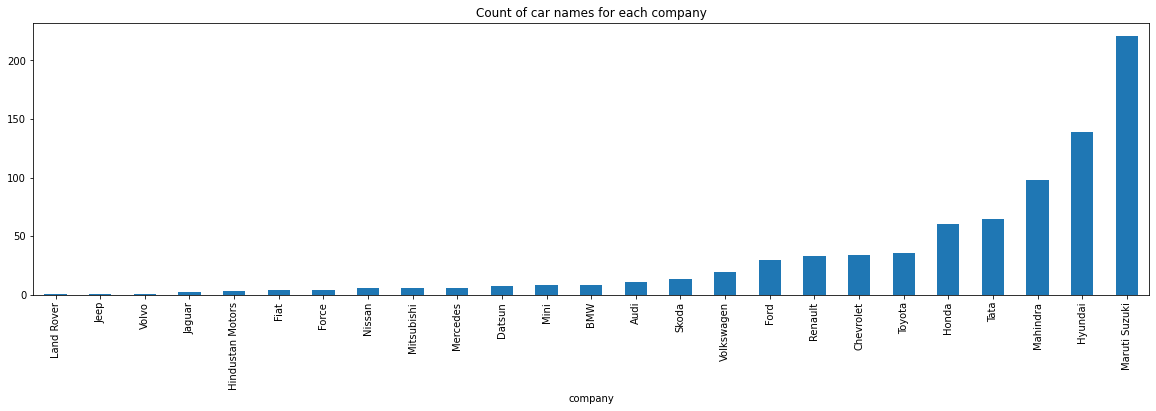

In [319]:
# Car count for each company
qq=data.groupby('company')
display(qq.name.count().sort_values())

qq.name.count().sort_values().plot(kind='bar', figsize=(20,5))

from matplotlib import pyplot as plt
plt.title("Count of car names for each company")

In [320]:
data[data['company']=='Mahindra'].Price.sort_values()

850     130000
453     130000
413     165000
685     175000
699     175000
        ...   
425    1000000
648    1065000
366    1130000
563    1299000
562    8500003
Name: Price, Length: 98, dtype: int64

In [321]:
for i in data.company.unique():
  print(i)
  ll=data[data['company']==i].name.unique().tolist()
  ll.sort()
  display(ll)
  print("*************")

Hyundai


['Hyundai Accent',
 'Hyundai Accent Executive Edition',
 'Hyundai Accent GLE',
 'Hyundai Accent GLX',
 'Hyundai Creta',
 'Hyundai Creta 1.6 SX',
 'Hyundai Creta 1.6 SX Plus Petrol',
 'Hyundai Creta 1.6 SX Plus Petrol AT',
 'Hyundai Elantra 1.8 S',
 'Hyundai Elantra SX',
 'Hyundai Elite i20',
 'Hyundai Elite i20 Asta 1.2',
 'Hyundai Elite i20 Asta 1.4 CRDI',
 'Hyundai Elite i20 Magna 1.2',
 'Hyundai Elite i20 Sportz 1.2',
 'Hyundai Eon',
 'Hyundai Eon D Lite Plus',
 'Hyundai Eon Era Plus',
 'Hyundai Eon Magna',
 'Hyundai Eon Magna Plus',
 'Hyundai Eon Sportz',
 'Hyundai Fluidic Verna 1.6 CRDi SX',
 'Hyundai Getz',
 'Hyundai Getz GLE',
 'Hyundai Getz Prime 1.3 GLX',
 'Hyundai Getz Prime 1.3 GVS',
 'Hyundai Grand i10',
 'Hyundai Grand i10 Asta 1.1 CRDi',
 'Hyundai Grand i10 Asta 1.2 Kappa VTVT',
 'Hyundai Grand i10 Asta 1.2 Kappa VTVT O',
 'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
 'Hyundai Grand i10 Magna AT 1.2 Kappa VTVT',
 'Hyundai Grand i10 Sportz 1.2 Kappa VTVT',
 'Hyundai Grand i10

*************
Mahindra


['Mahindra Bolero DI',
 'Mahindra Bolero DI BSII',
 'Mahindra Bolero Power Plus SLE',
 'Mahindra Bolero SLE BS IV',
 'Mahindra Jeep CL550 MDI',
 'Mahindra Jeep MM 550 XDB',
 'Mahindra KUV100',
 'Mahindra KUV100 K8 6 STR',
 'Mahindra KUV100 K8 D 6 STR',
 'Mahindra Logan',
 'Mahindra Logan Diesel 1.5 DLS',
 'Mahindra Quanto C4',
 'Mahindra Quanto C8',
 'Mahindra Scorpio',
 'Mahindra Scorpio 2.6 CRDe',
 'Mahindra Scorpio 2.6 SLX',
 'Mahindra Scorpio LX BS III',
 'Mahindra Scorpio S10',
 'Mahindra Scorpio S10 4WD',
 'Mahindra Scorpio S4',
 'Mahindra Scorpio SLE BS IV',
 'Mahindra Scorpio SLX',
 'Mahindra Scorpio SLX 2.6 Turbo 8 Str',
 'Mahindra Scorpio VLX 2.2 mHawk Airbag BSIV',
 'Mahindra Scorpio VLX 2WD BS IV',
 'Mahindra Scorpio VLX 4WD Airbag',
 'Mahindra Scorpio VLX Airbag',
 'Mahindra Scorpio VLX Special Edition BS III',
 'Mahindra Scorpio Vlx BSIV',
 'Mahindra Scorpio W Turbo 2.6DX 9 Seater',
 'Mahindra TUV300 T4 Plus',
 'Mahindra TUV300 T8',
 'Mahindra Thar CRDe 4x4 AC',
 'Mahindr

*************
Ford


['Ford EcoSport',
 'Ford EcoSport Ambiente 1.5L TDCi',
 'Ford EcoSport Titanium 1.5 TDCi',
 'Ford EcoSport Titanium 1.5L TDCi',
 'Ford EcoSport Trend 1.5 Ti VCT',
 'Ford EcoSport Trend 1.5L TDCi',
 'Ford EcoSport Trend 1.5L Ti VCT',
 'Ford Endeavor 4x4 Thunder Plus',
 'Ford Fiesta',
 'Ford Fiesta SXi 1.6 ABS',
 'Ford Figo',
 'Ford Figo Diesel EXI',
 'Ford Figo Diesel EXI Option',
 'Ford Figo Duratorq Diesel Titanium 1.4',
 'Ford Figo Petrol LXI',
 'Ford Figo Petrol Titanium',
 'Ford Fusion 1.4 TDCi Diesel',
 'Ford Ikon 1.3 CLXi NXt Finesse',
 'Ford Ikon 1.3 Flair Josh 100',
 'Ford Ikon 1.6 Nxt']

*************
Maruti Suzuki


['Maruti Suzuki 800',
 'Maruti Suzuki 800 Std BS III',
 'Maruti Suzuki A Star Lxi',
 'Maruti Suzuki Alto',
 'Maruti Suzuki Alto 800',
 'Maruti Suzuki Alto 800 LXI CNG O',
 'Maruti Suzuki Alto 800 Lx',
 'Maruti Suzuki Alto 800 Lxi',
 'Maruti Suzuki Alto 800 Vxi',
 'Maruti Suzuki Alto AX',
 'Maruti Suzuki Alto K10 LXi CNG',
 'Maruti Suzuki Alto K10 New',
 'Maruti Suzuki Alto K10 VXi',
 'Maruti Suzuki Alto K10 VXi AMT',
 'Maruti Suzuki Alto K10 VXi AT',
 'Maruti Suzuki Alto LX',
 'Maruti Suzuki Alto LXi BS III',
 'Maruti Suzuki Alto Std BS IV',
 'Maruti Suzuki Baleno Delta 1.2',
 'Maruti Suzuki Baleno Sigma 1.2',
 'Maruti Suzuki Baleno Zeta 1.2',
 'Maruti Suzuki Celerio VDi',
 'Maruti Suzuki Ciaz VXi Plus',
 'Maruti Suzuki Ciaz ZXI Plus',
 'Maruti Suzuki Ciaz ZXi Plus RS',
 'Maruti Suzuki Dzire',
 'Maruti Suzuki Dzire LDI',
 'Maruti Suzuki Dzire VDI',
 'Maruti Suzuki Dzire ZXI',
 'Maruti Suzuki Eeco 5 STR WITH AC HTR',
 'Maruti Suzuki Eeco 7 STR',
 'Maruti Suzuki Ertiga',
 'Maruti Suzuki 

*************
Skoda


['Skoda Fabia',
 'Skoda Fabia 1.2L Diesel Ambiente',
 'Skoda Fabia 1.2L Diesel Elegance',
 'Skoda Fabia Classic 1.2 MPI',
 'Skoda Laura',
 'Skoda Octavia Classic 1.9 TDI MT',
 'Skoda Rapid Elegance 1.6 TDI CR MT',
 'Skoda Superb 1.8 TFSI AT',
 'Skoda Yeti Ambition 2.0 TDI CR 4x2']

*************
Audi


['Audi A3 Cabriolet 40 TFSI',
 'Audi A4 1.8 TFSI Multitronic Premium Plus',
 'Audi A4 2.0 TDI 177bhp Premium',
 'Audi A6 2.0 TDI Premium',
 'Audi A8',
 'Audi Q3 2.0 TDI quattro Premium',
 'Audi Q5 2.0 TDI quattro Premium Plus',
 'Audi Q7']

*************
Toyota


['Toyota Corolla',
 'Toyota Corolla Altis',
 'Toyota Corolla Altis 1.8 GL',
 'Toyota Corolla Altis 1.8 J',
 'Toyota Corolla Altis Diesel D4DG',
 'Toyota Corolla Altis GL Petrol',
 'Toyota Corolla Altis Petrol Ltd',
 'Toyota Corolla Altis VL AT Petrol',
 'Toyota Corolla H2',
 'Toyota Etios',
 'Toyota Etios G',
 'Toyota Etios GD',
 'Toyota Etios Liva',
 'Toyota Etios Liva Diesel',
 'Toyota Etios Liva G',
 'Toyota Etios Liva GD',
 'Toyota Fortuner',
 'Toyota Fortuner 3.0 4x2 MT',
 'Toyota Fortuner 3.0 4x4 MT',
 'Toyota Innova 2.0 G 8 STR BS IV',
 'Toyota Innova 2.0 G4',
 'Toyota Innova 2.5 E 8 STR',
 'Toyota Innova 2.5 E MS 7 STR BS IV',
 'Toyota Innova 2.5 G BS III 8 STR',
 'Toyota Innova 2.5 GX BS IV 7 STR',
 'Toyota Innova 2.5 V 7 STR',
 'Toyota Innova 2.5 Z Diesel 7 Seater',
 'Toyota Qualis']

*************
Renault


['Renault Duster',
 'Renault Duster 110 PS RxL Diesel',
 'Renault Duster 110 PS RxZ Diesel',
 'Renault Duster 110 PS RxZ Diesel Plus',
 'Renault Duster 110PS Diesel RxZ',
 'Renault Duster 85 PS RxE Diesel',
 'Renault Duster 85 PS RxL Diesel',
 'Renault Duster 85 PS RxL Explore LE',
 'Renault Duster 85PS Diesel RxL Optional with Nav',
 'Renault Duster RxL Petrol',
 'Renault Kwid',
 'Renault Kwid 1.0',
 'Renault Kwid 1.0 RXT AMT',
 'Renault Kwid RXT',
 'Renault Kwid RXT Opt',
 'Renault Lodgy 85 PS RXL',
 'Renault Scala RxL Diesel',
 'Renault Scala RxL Diesel Travelogue']

*************
Honda


['Honda Accord',
 'Honda Amaze',
 'Honda Amaze 1.2 S i VTEC',
 'Honda Amaze 1.2 VX i VTEC',
 'Honda Amaze 1.5 E i DTEC',
 'Honda Amaze 1.5 S i DTEC',
 'Honda Amaze 1.5 SX i DTEC',
 'Honda Brio',
 'Honda Brio V MT',
 'Honda Brio VX AT',
 'Honda City',
 'Honda City 1.5 E MT',
 'Honda City 1.5 EXi New',
 'Honda City 1.5 S Inspire',
 'Honda City 1.5 S MT',
 'Honda City 1.5 V AT',
 'Honda City 1.5 V MT',
 'Honda City 1.5 V MT Exclusive',
 'Honda City SV',
 'Honda City VX O MT Diesel',
 'Honda City VX Petrol',
 'Honda City ZX CVT',
 'Honda City ZX EXi',
 'Honda City ZX GXi',
 'Honda City ZX VTEC',
 'Honda Jazz S MT',
 'Honda Jazz VX MT',
 'Honda Mobilio',
 'Honda Mobilio S i DTEC',
 'Honda WR V S MT Petrol']

*************
Datsun


['Datsun GO T O',
 'Datsun Go Plus',
 'Datsun Redi GO',
 'Datsun Redi GO S',
 'Datsun Redi GO T O']

*************
Mitsubishi


['Mitsubishi Lancer 1.8 LXi',
 'Mitsubishi Pajero Sport 2.5 AT',
 'Mitsubishi Pajero Sport Limited Edition']

*************
Tata


['Tata Aria Pleasure 4X2',
 'Tata Bolt XM Petrol',
 'Tata Indica',
 'Tata Indica V2',
 'Tata Indica V2 DLE BS III',
 'Tata Indica V2 DLG',
 'Tata Indica V2 DLS BS III',
 'Tata Indica V2 DLX BS III',
 'Tata Indica V2 LS',
 'Tata Indica V2 Xeta e GLE',
 'Tata Indica V2 eLS',
 'Tata Indica eV2 LS',
 'Tata Indica eV2 eXeta eGLX',
 'Tata Indigo CS',
 'Tata Indigo CS GLS',
 'Tata Indigo CS LS DiCOR',
 'Tata Indigo CS eLS BS IV',
 'Tata Indigo CS eLX BS IV',
 'Tata Indigo LS',
 'Tata Indigo LX TDI BS III',
 'Tata Indigo Marina LS',
 'Tata Indigo eCS',
 'Tata Indigo eCS LS CR4 BS IV',
 'Tata Indigo eCS LX CR4 BS IV',
 'Tata Indigo eCS LX TDI BS III',
 'Tata Indigo eCS VX CR4 BS IV',
 'Tata Manza',
 'Tata Manza Aqua Quadrajet',
 'Tata Manza Aura Quadrajet',
 'Tata Manza ELAN Quadrajet',
 'Tata Nano',
 'Tata Nano Cx BSIV',
 'Tata Nano GenX XMA',
 'Tata Nano LX Special Edition',
 'Tata Nano Lx BSIV',
 'Tata Sumo Gold EX BS IV',
 'Tata Sumo Gold FX BSIII',
 'Tata Sumo Gold LX BS IV',
 'Tata Sumo G

*************
Volkswagen


['Volkswagen Jetta Comfortline 1.9 TDI AT',
 'Volkswagen Jetta Highline TDI AT',
 'Volkswagen Passat Diesel Comfortline AT',
 'Volkswagen Polo',
 'Volkswagen Polo Comfortline 1.2L P',
 'Volkswagen Polo Highline Exquisite P',
 'Volkswagen Polo Highline1.2L P',
 'Volkswagen Polo Trendline 1.5L D',
 'Volkswagen Vento Comfortline Diesel',
 'Volkswagen Vento Comfortline Petrol',
 'Volkswagen Vento Highline Plus 1.5 Diesel AT',
 'Volkswagen Vento Konekt Diesel Highline']

*************
Chevrolet


['Chevrolet Beat',
 'Chevrolet Beat Diesel',
 'Chevrolet Beat LS Diesel',
 'Chevrolet Beat LS Petrol',
 'Chevrolet Beat LT Diesel',
 'Chevrolet Beat LT Opt Diesel',
 'Chevrolet Beat LT Petrol',
 'Chevrolet Beat PS Diesel',
 'Chevrolet Cruze LTZ',
 'Chevrolet Cruze LTZ AT',
 'Chevrolet Enjoy',
 'Chevrolet Enjoy 1.4 LS 8 STR',
 'Chevrolet Sail 1.2 LS',
 'Chevrolet Sail UVA Petrol LT ABS',
 'Chevrolet Spark',
 'Chevrolet Spark 1.0 LT',
 'Chevrolet Spark LS 1.0',
 'Chevrolet Spark LT 1.0',
 'Chevrolet Spark LT 1.0 Airbag',
 'Chevrolet Tavera LS B3 10 Seats BSII',
 'Chevrolet Tavera Neo']

*************
Mini


['Mini Cooper S', 'Mini Cooper S 1.6']

*************
BMW


['BMW 3 Series 320d Sedan',
 'BMW 3 Series 320i',
 'BMW 5 Series 520d Sedan',
 'BMW 5 Series 530i',
 'BMW 7 Series 740Li Sedan',
 'BMW X1',
 'BMW X1 sDrive20d',
 'BMW X1 xDrive20d xLine']

*************
Nissan


['Nissan Micra XL',
 'Nissan Micra XV',
 'Nissan Sunny',
 'Nissan Sunny XL',
 'Nissan Terrano XL D Plus',
 'Nissan X Trail Select Variant']

*************
Hindustan Motors


['Hindustan Motors Ambassador',
 'Hindustan Motors Ambassador Classic Mark 4 – Befo']

*************
Fiat


['Fiat Linea Emotion 1.4 L T Jet Petrol',
 'Fiat Petra ELX 1.2 PS',
 'Fiat Punto Emotion 1.2']

*************
Force


['Force Motors Force One LX ABS 7 STR', 'Force Motors One SUV']

*************
Mercedes


['Mercedes Benz A Class A 180 Sport Petrol',
 'Mercedes Benz B Class B180 Sports',
 'Mercedes Benz C Class 200 CDI Classic',
 'Mercedes Benz C Class 200 K MT',
 'Mercedes Benz C Class C 220 CDI Avantgarde',
 'Mercedes Benz GLA Class 200 CDI Sport']

*************
Land Rover


['Land Rover Freelander 2 SE']

*************
Jaguar


['Jaguar XE XE Portfolio', 'Jaguar XF 2.2 Diesel Luxury']

*************
Jeep


['Jeep Wrangler Unlimited 4x4 Diesel']

*************
Volvo


['Volvo S80 Summum D4']

*************


# Machine Learning
* Outlier Detection and Removal
* Encoding
* Scaling
* Model Training

### Outlier Detection and Removal

year             AxesSubplot(0.125,0.125;0.133621x0.755)
Price         AxesSubplot(0.285345,0.125;0.133621x0.755)
kms_driven     AxesSubplot(0.44569,0.125;0.133621x0.755)
dtype: object

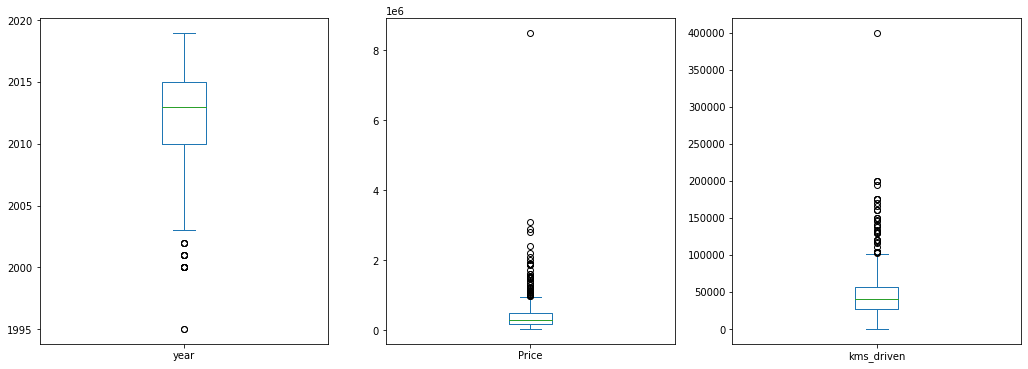

In [322]:
data.plot(kind='box', subplots=True, layout=(1,5), figsize=(30,6))

In [323]:
# For 'year'
display(data[data['year']<1998])
# This data looks good and should not be removed

# For 'Price'
display(data[data['Price']>6000000])
# This can be a chance that the car is highly modified and thats why its price has increased

# For 'kms_driven'
display(data[data['kms_driven']>350000])
# This seems to be a valid scenario, as Honda City is a very good car and is of great demand

# So, we don't need to remove any outlier

,name,company,year,Price,kms_driven,fuel_type
389,Maruti Suzuki Maruti 800 Std – Befo,Maruti Suzuki,1995,30000,55000,Petrol
768,Hindustan Motors Ambassador Classic Mark 4 – Befo,Hindustan Motors,1995,750000,37000,Petrol


,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


,name,company,year,Price,kms_driven,fuel_type
362,Honda City 1.5 V MT Exclusive,Honda,2010,240000,400000,Petrol


### Max car price for each company (Graph)

company
Fiat                 169500
Datsun               299999
Chevrolet            490000
Skoda                530000
Force                580000
Tata                 650000
Hindustan Motors     750000
Renault              800000
Honda                860000
Jeep                 950000
Maruti Suzuki       1000000
Hyundai             1200000
Volkswagen          1200000
Nissan              1200000
Mahindra            1299000
Toyota              1525000
BMW                 1600000
Mitsubishi          1725000
Volvo               1850000
Mini                1891111
Mercedes            2000000
Land Rover          2100000
Jaguar              2800000
Ford                2900000
Audi                3100000
Name: Price, dtype: int64

Text(0.5, 1.0, 'Max car price for each company')

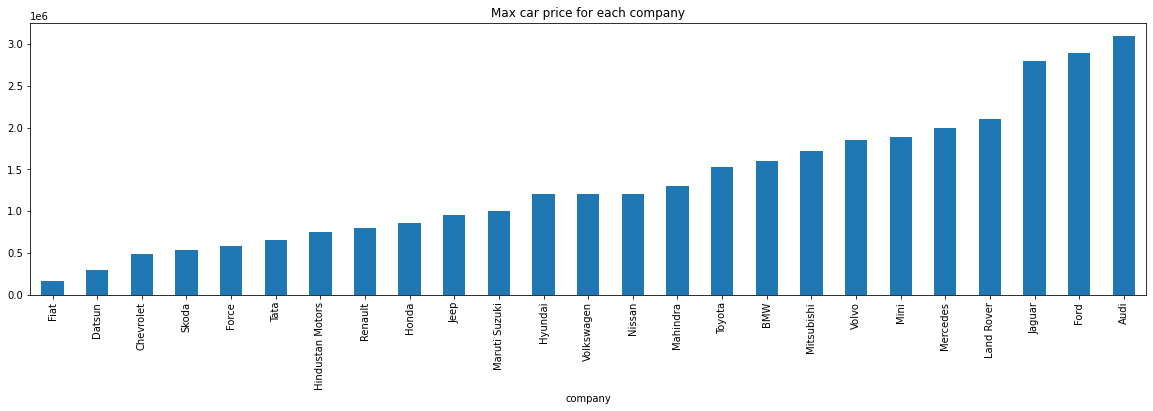

In [324]:
# Max car price for each company
data_price=data[data['Price']<6000000]    # Removing an outlier, but it can be a chance that the car is highly modified and thats why its price has increased

qq=data_price.groupby('company')
display(qq.Price.max().sort_values())

qq.Price.max().sort_values().plot(kind='bar', figsize=(20,5))

from matplotlib import pyplot as plt
plt.title("Max car price for each company")

### Average car price for each company (Graph)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Verna 1.4 VTVT,Hyundai,2014,375000,36000,Petrol
1,Hyundai Santro Xing GLS,Hyundai,2006,75000,46000,Petrol
2,Hyundai Verna Fluidic,Hyundai,2012,444999,40000,Diesel
3,Hyundai i10 Magna 1.2 Kappa2,Hyundai,2008,275000,100200,Petrol
4,Hyundai Grand i10 Magna AT 1.2 Kappa VTVT,Hyundai,2017,400000,20000,Petrol
...,...,...,...,...,...,...
101,Land Rover Freelander 2 SE,Land Rover,2015,2100000,30000,Diesel
102,Jaguar XE XE Portfolio,Jaguar,2016,2800000,8500,Petrol
103,Jaguar XF 2.2 Diesel Luxury,Jaguar,2013,2190000,29000,Diesel
104,Jeep Wrangler Unlimited 4x4 Diesel,Jeep,2015,950000,3528,Diesel


company
Fiat                109875.00
Tata                157000.00
Chevrolet           193000.00
Datsun              249000.00
Hindustan Motors    303333.33
Skoda               312299.80
Nissan              312799.60
Hyundai             313999.80
Volkswagen          374999.60
Maruti Suzuki       429800.00
Renault             488583.60
Honda               502799.20
Ford                538000.00
Mahindra            562999.60
Force               572500.00
Toyota              587000.00
Jeep                950000.00
Mercedes           1104800.20
BMW                1144800.00
Mitsubishi         1263000.00
Audi               1389800.00
Volvo              1850000.00
Mini               1891111.00
Land Rover         2100000.00
Jaguar             2495000.00
Name: Price, dtype: float64

Text(0.5, 1.0, 'Average car price for each company')

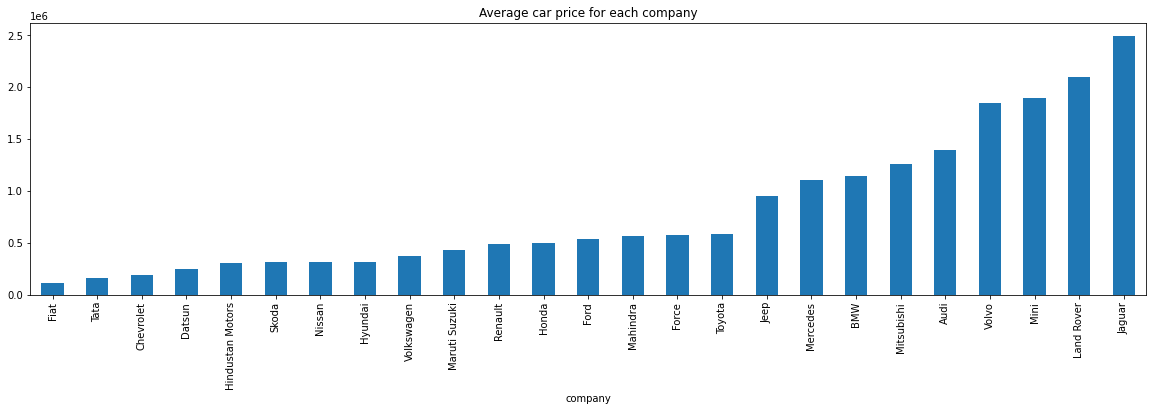

In [325]:
# Average car price for each company
# Taking only 5 samples from each company
data_price=data[data['Price']<6000000]    # Removing an outlier, but it can be a chance that the car is highly modified and thats why its price has increased

data_price2=pd.DataFrame([], columns=data_price.columns)
for i in data_price['company'].unique():
  data_price2=data_price2.append(data_price[data_price['company']==i].sample(frac=1).head(5))

data_price2.reset_index(inplace=True)
data_price2=data_price2.drop(['index'], axis=1)
display(data_price2)

qq=data_price2.groupby('company')
display(qq.Price.mean().sort_values())

qq.Price.mean().sort_values().plot(kind='bar', figsize=(20,5))

from matplotlib import pyplot as plt
plt.title("Average car price for each company")

### Testing

#### Encoding

In [326]:
data4=data.copy()

##### Type1

In [327]:
# 'fuel_type' column needs to be encoded
df=pd.get_dummies(data['fuel_type'])
data=pd.concat([data, df], axis=1)
data=data.drop(['fuel_type'], axis=1)

display(data.head(5))

,name,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,0,0,1
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,1,0,0
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,0,0,1
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,1,0,0
6,Ford Figo,Ford,2012,175000,41000,1,0,0


##### Type2

In [328]:
data2=data.copy()

# removing 'name' and proceeding with one-hot encoding of 'company'
data2=data2.drop(['name'], axis=1)
display(data2.head(5))

# one-hot encoding of 'company'
df2=pd.get_dummies(data['company'])
data2=pd.concat([data2, df2], axis=1)
data2=data2.drop(['company'], axis=1)

display(data2.head(5))

,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,Hyundai,2007,80000,45000,0,0,1
1,Mahindra,2006,425000,40,1,0,0
3,Hyundai,2014,325000,28000,0,0,1
4,Ford,2014,575000,36000,1,0,0
6,Ford,2012,175000,41000,1,0,0


,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2007,80000,45000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,425000,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,325000,28000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,575000,36000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012,175000,41000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Type3

In [329]:
data3=data.copy()

# keeping 'name' and proceeding with one-hot encoding of 'name' and 'company'
df2=pd.get_dummies(data['company'])
data3=pd.concat([data3, df2], axis=1)
data3=data3.drop(['company'], axis=1)

df2=pd.get_dummies(data['name'])
data3=pd.concat([data3, df2], axis=1)
data3=data3.drop(['name'], axis=1)

display(data3.head(5))

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Volkswagen Polo,Volkswagen Polo Comfortline 1.2L P,Volkswagen Polo Highline Exquisite P,Volkswagen Polo Highline1.2L P,Volkswagen Polo Trendline 1.5L D,Volkswagen Vento Comfortline Diesel,Volkswagen Vento Comfortline Petrol,Volkswagen Vento Highline Plus 1.5 Diesel AT,Volkswagen Vento Konekt Diesel Highline,Volvo S80 Summum D4
0,2007,80000,45000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,425000,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,325000,28000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,575000,36000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012,175000,41000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model creation and training

In [330]:
data_final=data3

In [331]:
x=data_final.drop(['Price'], axis=1)
y=pd.DataFrame(data_final['Price'], columns=['Price'])
display(x.head(5))
display(y.head(5))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)
print(x_train.shape, x_test.shape)

,year,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,Fiat,...,Volkswagen Polo,Volkswagen Polo Comfortline 1.2L P,Volkswagen Polo Highline Exquisite P,Volkswagen Polo Highline1.2L P,Volkswagen Polo Trendline 1.5L D,Volkswagen Vento Comfortline Diesel,Volkswagen Vento Comfortline Petrol,Volkswagen Vento Highline Plus 1.5 Diesel AT,Volkswagen Vento Konekt Diesel Highline,Volvo S80 Summum D4
0,2007,45000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,28000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,36000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012,41000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Price
0,80000
1,425000
3,325000
4,575000
6,175000


(652, 493) (164, 493)


In [332]:
# Testing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
pipe=Pipeline([('scaler', StandardScaler()),
               ('model', LinearRegression())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


pipe=Pipeline([('model', LinearRegression())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


from sklearn.linear_model import Ridge
pipe=Pipeline([('model', Ridge())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


from sklearn.linear_model import Lasso
pipe=Pipeline([('model', Lasso())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


from sklearn.ensemble import AdaBoostRegressor
pipe=Pipeline([('model', AdaBoostRegressor())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))

-8.063954129429904e+28
-257113022576.32166
0.7091101232395409
0.73181650451469
-1.1794555040640669


In [333]:
# Lasso is giving best results, so proceeding ahead with tuning it
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
pipe=Pipeline([('model', Lasso())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


pipe=Pipeline([('scaler', StandardScaler()),
               ('model', Lasso())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


pipe=Pipeline([('pca', PCA()),
               ('model', Lasso())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))


pipe=Pipeline([('scaler', StandardScaler()),
               ('pca', PCA()),
               ('model', Lasso())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred))

0.73181650451469
0.7160673875218118
0.7135685267266192
0.7313601666150531


In [334]:
# Testing
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

model_final=model

0.73181650451469


#### Testing vs Predicted Values (Graph)

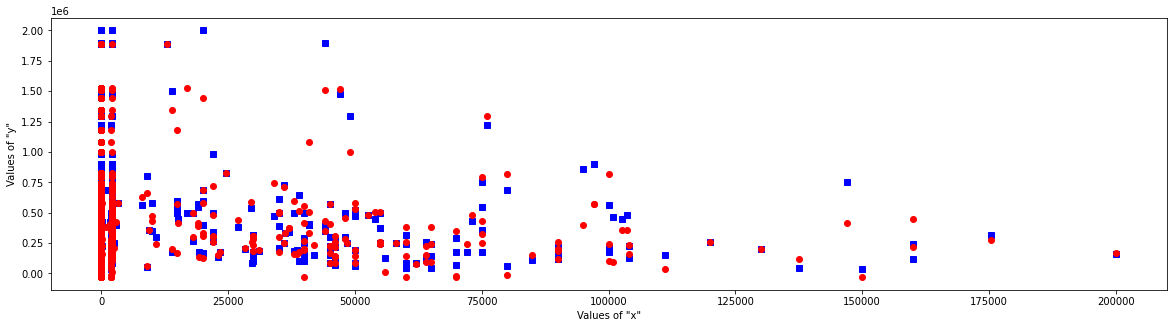

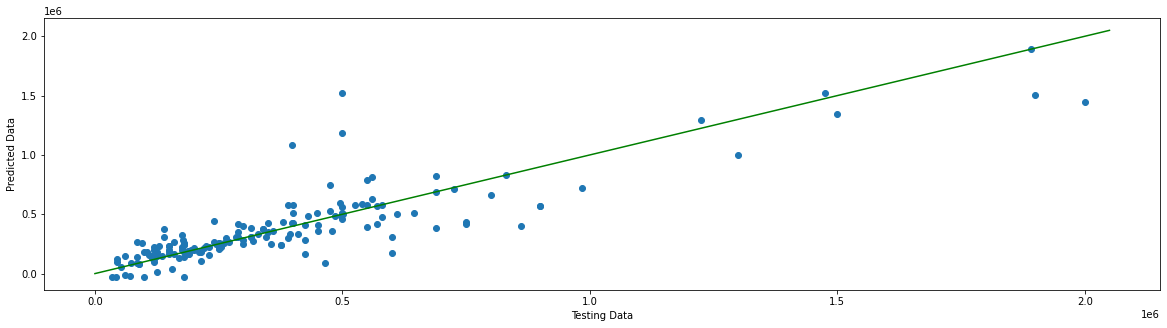

In [335]:
plt.figure(figsize=(20,5))
# Testing Data
plt.plot(x_test, y_test, 's', color='Blue')
# Predicted Data
plt.plot(x_test, y_pred, 'o', color='Red')
plt.xlabel('Values of "x"')
plt.ylabel('Values of "y"')
plt.show()

plt.figure(figsize=(20,5))
plt.scatter(y_test, y_pred)
plt.plot(range(2050000), range(2050000), color='Green')
plt.xlabel('Testing Data')
plt.ylabel('Predicted Data')
plt.show()

In [336]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [337]:
# Testing
import lazypredict
from lazypredict.Supervised import LazyRegressor

model=LazyRegressor(verbose=0, ignore_warnings=False)
models, prediction = model.fit(x_train, x_test, y_train, y_test)
models

 95%|█████████▌| 40/42 [01:22<00:02,  1.17s/it]

[21:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [01:23<00:00,  1.98s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,34236752048704836023128877805579084561291196288...,-6931366979185641134084268304670523395520176670...,8813200076216901695501997441024.00,1.71
TransformedTargetRegressor,39831046154456805000695775232.00,-80639541294299043355416330240.00,95060086983886667776.00,0.15
LinearRegression,39831046154456805000695775232.00,-80639541294299043355416330240.00,95060086983886667776.00,0.39
RANSACRegressor,1870595872009636512215859200.00,-3787095937197423660906840064.00,20600479849296764928.00,10.65
LinearSVR,2.13,-1.30,507423.02,0.14
MLPRegressor,2.13,-1.29,506968.93,9.56
AdaBoostRegressor,2.12,-1.26,503555.05,0.40
KernelRidge,1.87,-0.76,443599.50,0.22
GaussianProcessRegressor,1.53,-0.07,345872.58,1.10


##### So, we got to know that LASSO is working best in this scenario

### Final Model Creation

#### Now, creating a final model with one-hot encoder, column transformer and Lasso Regressor model

In [338]:
data4.company.value_counts().sort_index()

Audi                 11
BMW                   8
Chevrolet            34
Datsun                7
Fiat                  4
Force                 4
Ford                 30
Hindustan Motors      3
Honda                60
Hyundai             139
Jaguar                2
Jeep                  1
Land Rover            1
Mahindra             98
Maruti Suzuki       221
Mercedes              6
Mini                  8
Mitsubishi            6
Nissan                6
Renault              33
Skoda                13
Tata                 65
Toyota               36
Volkswagen           19
Volvo                 1
Name: company, dtype: int64

In [339]:
data4.to_csv('/content/drive/MyDrive/ColabNotebooks/ML : Quikr Car Price Prediction/cleaned_data.csv')

In [340]:
# Splitting input and output
x=data4.drop(['Price'], axis=1)
y=pd.DataFrame(data4['Price'], columns=['Price'])

# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)

In [341]:
# One-hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(data4[['name', 'company', 'fuel_type']])

from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((
    OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough')

In [342]:
# Model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [343]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('onehot', column_trans),
                ('model', model)])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)

In [344]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.7208602873024916


In [345]:
x_train

,name,company,year,kms_driven,fuel_type
888,Tata Zest XM Diesel,Tata,2018,27000,Diesel
77,Honda Amaze,Honda,2015,22000,Petrol
272,Renault Duster 85 PS RxE Diesel,Renault,2014,59000,Diesel
133,Honda City 1.5 V MT,Honda,2010,35000,Petrol
587,Tata Indigo CS eLX BS IV,Tata,2016,104000,Diesel
...,...,...,...,...,...
611,Toyota Corolla Altis GL Petrol,Toyota,2010,55000,Petrol
529,Maruti Suzuki Maruti 800 AC,Maruti Suzuki,2001,75000,Petrol
565,Hyundai Accent GLE,Hyundai,2006,55000,Petrol
204,Maruti Suzuki Swift VXI BSIII,Maruti Suzuki,2006,45000,Petrol


In [346]:
data_test = np.array(['Maruti Suzuki Swift','Maruti Suzuki',2019,100,'Petrol']).reshape(1,5)
data_test2= pd.DataFrame(data_test, columns=['name','company','year','kms_driven','fuel_type'])
data_out=pipe.predict(data_test2)
print(data_out[0][0])

457979.6487956941


In [347]:
import pickle
pickle.dump(pipe, open('/content/drive/MyDrive/ColabNotebooks/ML : Quikr Car Price Prediction/model_quikr_car_price_prediction.pkl', 'wb'))